# L= 1

### STOCHASTIC DESCENT

In [14]:
def correlation(matrix,NSTEPS):
    n_row = matrix.shape[0]
    n_col = matrix.shape[1] 
    mean_hx = np.array([matrix[:,i].sum()/n_row for i in range(n_col)])
    arg_sum = [ np.array([ ((matrix[j,i]-mean_hx[j])/n_row)**2 for i in range(n_col)]).sum() for j in range(n_row)]
    return  (1/(16*NSTEPS))*(np.array(arg_sum).sum())

In [20]:
from SD import stochastic_descent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantum_state import i

In [21]:
T = 1.8
dt = 0.01
iterations = int(1e3)

print("Total time of the protocol:", T)
print("Time step:", dt)
print("Number of timesteps:", int(T/dt))

print("Running SD for %d ietartions" %iterations)

qtarget = np.array([-1/np.sqrt(4) - 1/np.sqrt(4)*i, 1/np.sqrt(2) + 0.j])
qstart = np.array([+1/np.sqrt(4) + 1/np.sqrt(4)*i,1/np.sqrt(2) + 0.j])

percentage_flips=20
h = [-4,4]
L = 1

Total time of the protocol: 1.8
Time step: 0.01
Number of timesteps: 180
Running SD for 1000 ietartions


In [3]:
best_protocol, fidelity = stochastic_descent(qstart, qtarget, L, T, dt, iterations, 
                        flips = percentage_flips, field_list = h,beta=1,exp_decay_flip=False,
                                             metropolis_choice=False,verbose = True, check_norm = True)

print("Best reached fidelity:", fidelity[-1])

UPDATED  ITERATION N° 0
UPDATED  ITERATION N° 1
UPDATED  ITERATION N° 2
UPDATED  ITERATION N° 7
UPDATED  ITERATION N° 10
UPDATED  ITERATION N° 23
UPDATED  ITERATION N° 39

Best reached fidelity: 0.9879508584733461


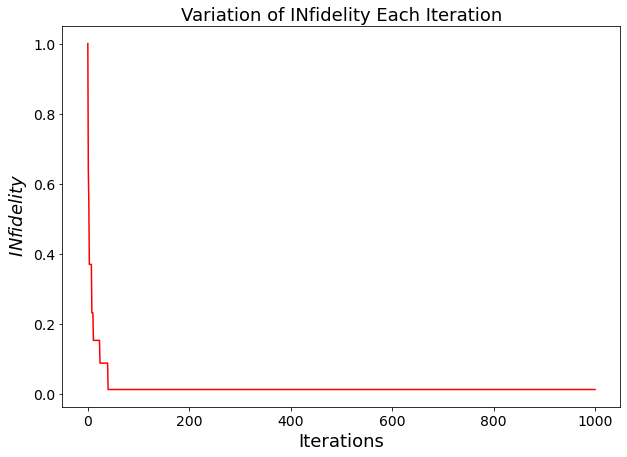

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.array(1-np.array(fidelity)),color='r')
ax.set_title(r"Variation of INfidelity Each Iteration", fontsize=18)
ax.set_xlabel("Iterations", fontsize=18)
ax.set_ylabel(r" $INfidelity$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14) 

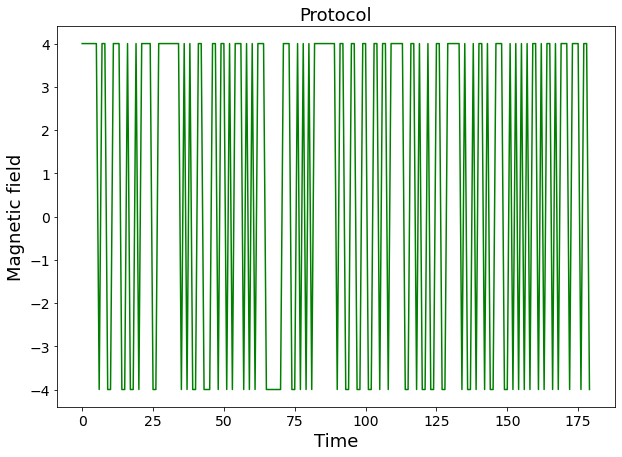

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(best_protocol,color='g')
ax.set_title(r"Protocol", fontsize=18)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel(r"Magnetic field", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

### VISUALIZATION

In [13]:
from quantum_state import i, evolution_from_protocol, spectral_time_evolution, compute_fidelity
from qutip import basis, Bloch
from gif import qutip_qstate

In [14]:
evolution = evolution_from_protocol(qstart, qtarget, best_protocol, spectral_time_evolution, dt, L, make_gif="bloch_gif.gif")

b = Bloch()
start = qutip_qstate(qstart)
target = qutip_qstate(qtarget)
final = qutip_qstate(evolution[-1])
b.vector_color = ["g", "y", "r"]
b.add_states(start) #green
b.add_states(target) #yellow
b.add_states(final) #red

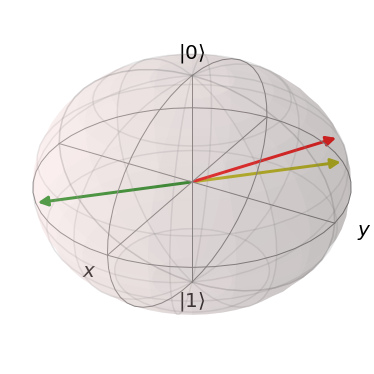

In [15]:
b.show()

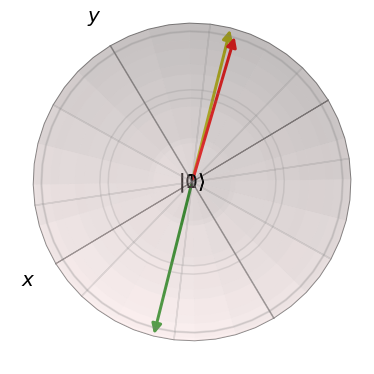

In [16]:
b.axes.view_init(-90, 30)
b.show()

### TENTATIVO PHASE DIAGRAM

In [44]:
qstart = np.array([-1/2 - (np.sqrt(5))/2 ,1], dtype=complex)
qtarget = np.array([+1/2 + (np.sqrt(5))/2 ,1], dtype=complex)
qstart=qstart/np.sqrt(np.vdot(qstart,qstart))
qtarget=qtarget/np.sqrt(np.vdot(qtarget,qtarget))

fidelity_for_txt = []
times = np.arange(0,4.25,step=0.0.25)
iter_for_each_time = 20

In [48]:
for T in times:
    temp_fid = []
    best_prot = []
    for _ in range(iter_for_each_time):
        best_protocol, fidelity = stochastic_descent(qstart, qtarget, L, T, dt, iterations, 
                        flips = percentage_flips, field_list = h,beta=1,exp_decay_flip=False,
                                             metropolis_choice=False,verbose = True, check_norm = False)
        temp_fid.append(fidelity[-1])
        best_prot.append(best_protocol)
        fidelity_for_txt.append(temp_fid)
    best_prot = np.array([best_prot])
    with open('protocols/testT'+str(T)+'.npy', 'wb') as f:
        np.save(f,best_prot)
    f.close()
np.savetxt('fidelity.txt', fidelity_for_txt, delimiter = ',',header="Matrix with as entries the values of fidelity dimension times x iterations")

#  send_tg_message()

In [49]:
np.load('protocols/testT1.5.npy')

array([[[-4, -4, -4,  4,  4, -4,  4,  4, -4, -4, -4, -4, -4, -4,  4,  4,
         -4, -4,  4,  4, -4,  4,  4,  4, -4,  4, -4, -4,  4,  4,  4, -4,
          4,  4,  4, -4, -4, -4,  4, -4,  4,  4,  4, -4,  4, -4,  4, -4,
         -4, -4, -4,  4, -4,  4, -4, -4,  4,  4,  4, -4, -4,  4,  4,  4,
         -4,  4,  4,  4,  4,  4, -4, -4,  4,  4, -4,  4, -4, -4,  4, -4,
         -4,  4,  4, -4, -4, -4, -4, -4, -4, -4, -4,  4, -4, -4,  4, -4,
          4, -4,  4, -4, -4,  4,  4, -4,  4,  4, -4, -4,  4,  4, -4,  4,
         -4,  4,  4, -4,  4, -4, -4,  4,  4, -4,  4,  4, -4, -4,  4, -4,
          4, -4, -4,  4,  4, -4,  4,  4, -4,  4,  4,  4,  4, -4,  4, -4,
          4, -4,  4,  4,  4,  4],
        [ 4,  4,  4, -4,  4, -4, -4, -4, -4,  4, -4,  4,  4,  4,  4,  4,
          4, -4,  4, -4,  4,  4,  4, -4, -4,  4, -4,  4, -4, -4,  4,  4,
         -4,  4, -4,  4,  4, -4, -4,  4, -4,  4,  4,  4,  4, -4, -4, -4,
          4,  4, -4, -4,  4, -4, -4, -4,  4,  4,  4,  4,  4,  4,  4, -4,
          4, -4, 

In [25]:
loaded_fidelity = pd.read_csv('fidelity.txt', skiprows=1,header=None)
loaded_fidelity

,0,1,2,3,4
0,1.232595e-32,1.232595e-32,1.232595e-32,1.232595e-32,1.232595e-32
1,3.545001e-01,6.841194e-01,7.250696e-01,7.506976e-01,7.833346e-01
2,9.593316e-01,8.317230e-01,9.991085e-01,9.712892e-01,9.732419e-01
3,9.422980e-01,9.425100e-01,9.639133e-01,7.473879e-01,9.756886e-01
4,7.099378e-01,9.988282e-01,9.388167e-01,7.482000e-01,9.807013e-01
5,9.987962e-01,9.655926e-01,9.371300e-01,9.470196e-01,9.775410e-01
6,9.160384e-01,8.620243e-01,9.684454e-01,9.953176e-01,9.899183e-01
7,9.972413e-01,9.417226e-01,9.852441e-01,9.453007e-01,9.932019e-01
8,9.896847e-01,9.713582e-01,9.509265e-01,9.968044e-01,9.840233e-01


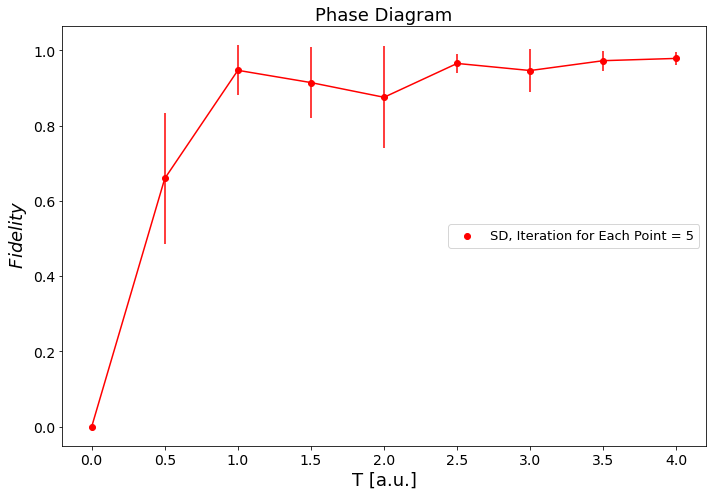

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
ax.errorbar(times,loaded_fidelity.mean(axis=1).values, yerr=loaded_fidelity.std(axis=1).values, color="r")
ax.scatter(times,loaded_fidelity.mean(axis=1).values,color='r',label="SD, Iteration for Each Point = "+str(iter_for_each_time))
ax.set_title(r"Phase Diagram", fontsize=18)
ax.set_xlabel("T [a.u.]", fontsize=18)
ax.set_ylabel(r" $Fidelity$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=13, loc=5)
fig.tight_layout()
plt.show()